## import stuff

In [1]:
#importing things
import pandas as pd
import os
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
import scipy.stats as st
from scipy.linalg import hadamard
from scipy.stats import ttest_ind_from_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from collections import OrderedDict
import seaborn as sns
import colorsys
from functools import reduce
from scipy.optimize import curve_fit
from operator import itemgetter
import math
import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

# correlation between replicates

In [2]:
ch65d = pd.DataFrame(pd.read_csv('../../Kd_inference/results_CH65/Kds/Kds_CH65d.tsv',delimiter='\t',dtype={'geno': str}),columns=('geno', 'Mean fluorescence expression'))
ch65e = pd.DataFrame(pd.read_csv('../../Kd_inference/results_CH65/Kds/Kds_CH65e.tsv',delimiter='\t',dtype={'geno': str}),columns=('geno', 'Mean fluorescence expression'))
kd = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20221008_CH65_QCfilt_REPfilt.csv',delimiter=',',dtype={'geno': str}),columns=('geno','MA90_mean','SI06_mean','G189E_mean'))
#merge on genotype
CH65_expression = pd.DataFrame()
CH65_expression = pd.merge(ch65d, ch65e, on='geno',how='outer')
CH65_expression = pd.merge(CH65_expression, kd, on='geno',how='outer')
CH65_expression['som_mut']=CH65_expression['geno'].apply(sum_digits)
print(np.mean(CH65_expression['Mean fluorescence expression_x']),np.mean(CH65_expression['Mean fluorescence expression_y']))
CH65_expression['exp_repd_norm']=CH65_expression['Mean fluorescence expression_x']/np.mean(CH65_expression['Mean fluorescence expression_x'])
CH65_expression['exp_repe_norm']=CH65_expression['Mean fluorescence expression_y']/np.mean(CH65_expression['Mean fluorescence expression_y'])
CH65_expression['exp_norm_mean']=CH65_expression[['exp_repd_norm','exp_repe_norm']].mean(axis=1)
CH65_expression['exp_norm_sem']=CH65_expression[['exp_repd_norm','exp_repe_norm']].sem(axis=1)
CH65_expression.to_csv('CH65_expression_Kd_toplot.csv')
CH65_expression

3.247014956288429 3.343562241033


,geno,Mean fluorescence expression_x,Mean fluorescence expression_y,MA90_mean,SI06_mean,G189E_mean,som_mut,exp_repd_norm,exp_repe_norm,exp_norm_mean,exp_norm_sem
0,0000000000000000,3.378314,3.233390,8.551773,6.000000,6.000000,0,1.040437,0.967049,1.003743,0.036694
1,0000000000000001,3.246762,3.153360,8.582682,6.000000,6.000000,1,0.999922,0.943114,0.971518,0.028404
2,0000000000000010,3.396899,3.336599,8.322928,6.000000,6.000000,1,1.046160,0.997917,1.022039,0.024122
3,0000000000000011,3.400190,3.574160,8.482757,6.000000,6.000000,2,1.047174,1.068968,1.058071,0.010897
4,0000000000000100,3.402620,3.201350,8.549076,6.000000,6.000000,1,1.047922,0.957467,1.002695,0.045228
...,...,...,...,...,...,...,...,...,...,...,...
65531,1111111111111011,3.089077,3.434111,10.101516,9.360610,9.787656,15,0.951359,1.027082,0.989220,0.037861
65532,1111111111111100,2.975957,3.325228,10.061378,9.016422,9.706458,14,0.916521,0.994516,0.955519,0.038998
65533,1111111111111101,3.270452,3.448332,10.132678,9.262786,9.729929,15,1.007218,1.031335,1.019276,0.012058
65534,1111111111111110,3.387342,3.403144,9.962080,8.794671,9.634932,15,1.043217,1.017820,1.030519,0.012699


/var/folders/pt/19trqkw56fjfrk2frchqhv2h0000gn/T/ipykernel_21737/3765122191.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)


0.32347614505572997


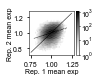

In [3]:
#CH65
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_repd_norm', 'exp_repe_norm']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_repd_norm'], plotting['exp_repe_norm'],cmap='Greys',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 1 mean exp",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 mean exp",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['exp_repd_norm']
y = plotting['exp_repe_norm']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0.75,1.25])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['exp_repd_norm'], plotting['exp_repe_norm'])
m, b = np.polyfit(plotting['exp_repd_norm'], plotting['exp_repe_norm'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/CH65_expcorr.png',transparent=True, dpi=600,bbox_inches='tight')

# correlation between expression and binding

-0.16995262986746382


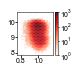

In [4]:
#CH65 MA90 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(0.8,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'MA90_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['MA90_mean'],cmap='Reds',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("",fontsize=7,labelpad=1)
plt.ylabel("",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['MA90_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['MA90_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_MA90.png',transparent=True, dpi=600,bbox_inches='tight')

-0.14586768242360346


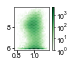

In [5]:
#CH65 SI06 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(0.8,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'SI06_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['SI06_mean'],cmap='Greens',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("",fontsize=7,labelpad=1)
plt.ylabel("",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['SI06_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['SI06_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_SI06.png',transparent=True, dpi=600,bbox_inches='tight')

-0.15454066537259367


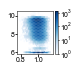

In [6]:
#CH65 G189E 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(0.8,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'G189E_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['G189E_mean'],cmap='Blues',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("",fontsize=7,labelpad=1)
plt.ylabel("",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['G189E_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['G189E_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_G189E.png',transparent=True, dpi=600,bbox_inches='tight')

# change in expression by mutation position

In [7]:
import matplotlib
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

In [9]:
#read in data
dExp = pd.DataFrame(pd.read_csv('20221008_CH65_dExp.csv',dtype={'source':'str', 'target':'str'}))
dExp

,Mutation,dexp,Number of mutations,dexp_sem,source,target,pos1,pos2,pos3,pos4,...,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16
0,N26D,-0.007876,0,0.059631,0000000000000000,1000000000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N26D,0.054087,1,0.040934,0000000000000001,1000000000000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,N26D,0.018373,1,0.028127,0000000000000010,1000000000000010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,N26D,0.007845,2,0.023688,0000000000000011,1000000000000011,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,N26D,-0.034128,1,0.048444,0000000000000100,1000000000000100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524283,R87K,0.070645,14,0.087392,1111111111110110,1111111111110111,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
524284,R87K,-0.078354,13,0.020434,1111111111111000,1111111111111001,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
524285,R87K,-0.030866,14,0.039121,1111111111111010,1111111111111011,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
524286,R87K,0.063758,14,0.040820,1111111111111100,1111111111111101,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


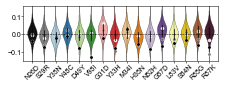

In [23]:
##Expression
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','gold','#b15928','#4f1530']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="dexp", data=dExp,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dExp.png',transparent=True, dpi=600,bbox_inches='tight')


# change in expression by number of mutations

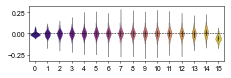

In [24]:
##expression
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="dexp", data=dExp,scale='area',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',
    pad=2,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dExp_num.png',transparent=True, dpi=600,bbox_inches='tight')


## do some statistics

In [12]:
#do a two-sided t-test to see if mean is different from zero
Exp_dKd_mean = []
Exp_dKd_sem = []
#Exp
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
for mutation_name in mutation_names:
    vals_1 = np.array(dExp['dexp'][dExp['Mutation']==mutation_name])
    mean = np.nanmean(vals_1)
    sem = st.sem(vals_1, nan_policy='omit')
    Exp_dKd_mean.append(mean)
    Exp_dKd_sem.append(sem)
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(mutation_name,tstat,pval,n1,n2,lab)
print(Exp_dKd_mean)
print(Exp_dKd_sem)

N26D 17.317944661562684 6.844225476478735e-67 32768 1 ***
S29R -24.207971676210622 2.464566521309469e-128 32768 1 ***
Y35N -65.93204230739563 0.0 32768 1 ***
Y48C 17.53488261459886 1.5968008722761843e-68 32768 1 ***
D49Y -28.146093560063825 3.013973015430012e-172 32768 1 ***
V98I -25.344924341972238 2.3089287289406884e-140 32768 1 ***
G31D 90.94698129198028 0.0 32768 1 ***
Y33H -18.423832660507937 2.0358365616704825e-75 32768 1 ***
M34I 31.44757690638677 6.910379681482696e-214 32768 1 ***
H35N -67.94384524277676 0.0 32768 1 ***
N52H -46.11916192052794 0.0 32768 1 ***
G57D 75.39415111733742 0.0 32768 1 ***
L83V -9.09692267521207 9.802623345130698e-20 32768 1 ***
S84N 6.2065898542616305 5.479453844564295e-10 32768 1 ***
R85G 54.10641195438286 0.0 32768 1 ***
R87K 49.78681837535663 0.0 32768 1 ***
[0.004296969902969638, -0.006044595190145077, -0.016699684061599673, 0.004488839109594584, -0.0072391864041031675, -0.0064375621381364614, 0.023813472097726135, -0.004813621866294677, 0.00822387

## CH65: correlation between mean change in expression and mean change in binding for each site

In [25]:
#read in data for change in Kd
toplot = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/dKd_summary.csv'),index=None)
toplot['dExp_mean'] = Exp_dKd_mean
toplot['dExp_sem'] = Exp_dKd_sem
toplot['sum']=abs(toplot['MA90_dKd_mean'])+abs(toplot['SI06_dKd_mean'])+abs(toplot['G189E_dKd_mean'])
toplot['total_err']=((toplot['MA90_dKd_sem'])**2+(toplot['SI06_dKd_sem'])**2+(toplot['G189E_dKd_sem'])**2)**(1/2)
toplot


,Unnamed: 0,mutation_names,MA90_dKd_mean,MA90_dKd_sem,SI06_dKd_mean,SI06_dKd_sem,G189E_dKd_mean,G189E_dKd_sem,dExp_mean,dExp_sem,sum,total_err
0,0,N26D,-0.005957,0.000334,0.119398,0.001371,-0.027467,0.001012,0.004297,0.000248,0.152822,0.001736
1,1,S29R,0.051101,0.000375,0.155232,0.001594,0.291882,0.002087,-0.006045,0.000250,0.498214,0.002652
2,2,Y35N,0.473806,0.001168,0.386928,0.003539,1.072542,0.004765,-0.016700,0.000253,1.933276,0.006050
3,3,Y48C,-0.008687,0.001883,0.024759,0.003397,0.006277,0.004498,0.004489,0.000256,0.039723,0.005943
4,4,D49Y,0.243614,0.001919,0.440136,0.004287,0.642029,0.004861,-0.007239,0.000257,1.325778,0.006759
5,5,V98I,0.013458,0.000325,0.042783,0.000997,-0.017341,0.000974,-0.006438,0.000254,0.073581,0.001432
6,6,G31D,0.147921,0.000663,0.155233,0.001657,0.499256,0.002958,0.023813,0.000262,0.802410,0.003455
7,7,Y33H,0.243595,0.000834,0.253259,0.002578,0.383065,0.002482,-0.004814,0.000261,0.879919,0.003675
8,8,M34I,0.015517,0.000450,0.096762,0.001454,0.082657,0.001241,0.008224,0.000262,0.194935,0.001963
9,9,H35N,0.163805,0.000759,0.313219,0.002805,0.379275,0.003105,-0.017927,0.000264,0.856300,0.004253


### plot correlation between sum of delta(-logKd) and delta(mean expression bin)

-0.5683859509719429


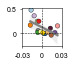

In [26]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dExp_mean'], toplot['MA90_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dExp_mean'], toplot['MA90_dKd_mean'])
plt.figure(figsize=(0.7,0.7))
ax = sns.scatterplot(x='dExp_mean', y='MA90_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dExp_sem'],xerr=toplot['MA90_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dExp_mean', y='MA90_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.03,0.03)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
plt.yticks(ticks=[0,0.5],labels=['0','0.5'],fontsize=7)
plt.savefig('images/CH65_deltaexp_kd_corr_MA90.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

-0.4325543896898825


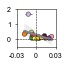

In [27]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dExp_mean'], toplot['SI06_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dExp_mean'], toplot['SI06_dKd_mean'])
plt.figure(figsize=(0.7,0.7))
ax = sns.scatterplot(x='dExp_mean', y='SI06_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dExp_sem'],xerr=toplot['SI06_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dExp_mean', y='SI06_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.03,0.03)
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
plt.yticks(ticks=[0,1,2],labels=['0','1','2'],fontsize=7)
plt.savefig('images/CH65_deltaexp_kd_corr_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

-0.49331833112849677


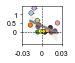

In [16]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dExp_mean'], toplot['G189E_dKd_mean'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dExp_mean'], toplot['G189E_dKd_mean'])
plt.figure(figsize=(0.7,0.7))
ax = sns.scatterplot(x='dExp_mean', y='G189E_dKd_mean',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dExp_sem'],xerr=toplot['G189E_dKd_sem'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dExp_mean', y='G189E_dKd_mean',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.03,0.03)
plt.xlabel('',fontsize=7,labelpad=0.5)
plt.ylabel('',fontsize=7,labelpad=0.5)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
plt.yticks(ticks=[0,0.5,1],labels=['0','0.5','1'],fontsize=7)
plt.savefig('images/CH65_deltaexp_kd_corr_G189E.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

-0.5020642264328485


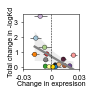

In [17]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['dExp_mean'], toplot['sum'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['dExp_mean'], toplot['sum'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='dExp_mean', y='sum',data=toplot,hue='mutation_names',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['dExp_sem'],xerr=toplot['total_err'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='dExp_mean', y='sum',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.03,0.03)
plt.ylim(-0.1,3.5)
plt.axvline(x=0,linestyle='dashed',linewidth=0.5,color='black')
plt.xlabel('Change in expresison',fontsize=7,labelpad=0.5)
plt.ylabel('Total change in -logKd',fontsize=7,labelpad=0.5)
plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
plt.yticks(ticks=[0,1,2,3],labels=['0','1','2','3'],fontsize=7)
plt.savefig('images/CH65_deltaexp_kd_corr_sum.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

## correlation between isogenic and tite-seq

In [20]:
#read in data for change in Kd
exp_iso = pd.DataFrame(pd.read_csv('../Expression_Figures/Exp_corr_titeseq_isogenic.csv'),index=None)
exp_iso.head()

,shortname,Exp_titeseq,Exp_err_titeseq,Exp_isogenic_rep1,Exp_isogenic_rep2,Exp_isogenic,Exp_sem_isogenic
0,germline,1.003743,0.036694,15184.0,11821.3,13502.65,1681.35
1,somatic,0.957571,0.056339,11165.3,8312.5,9738.90,1426.40
2,"""0010000000100000""",0.967398,0.014020,10516.8,7891.1,9203.95,1312.85
3,"""0000001111100000""",1.015221,0.029630,13866.0,11373.7,12619.85,1246.15
4,"""0110010010111110""",0.999610,0.006227,10673.6,8820.0,9746.80,926.80


0.9019312379033264


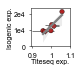

In [21]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(exp_iso['Exp_titeseq'], exp_iso['Exp_isogenic'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(exp_iso['Exp_titeseq'], exp_iso['Exp_isogenic'])
plt.figure(figsize=(0.7,0.7))
colors = ['firebrick','firebrick','firebrick','firebrick','firebrick','firebrick']
ax = sns.scatterplot(x='Exp_titeseq', y='Exp_isogenic',data=exp_iso,hue='shortname',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, xerr=exp_iso['Exp_err_titeseq'],yerr=exp_iso['Exp_sem_isogenic'], fmt=' ', zorder=-1,color='k',linewidth=0.5)



sns.regplot(x='Exp_titeseq', y='Exp_isogenic',data=exp_iso, scatter=False, ax=ax,color='gray')
#plt.xlim(-0.03,0.03)
plt.xlabel('Titeseq exp.',fontsize=7,labelpad=0.5)
plt.ylabel('Isogenic exp.',fontsize=7,labelpad=0.5)
plt.xticks(ticks=[0.9,1,1.1],labels=['0.9','1','1.1'],fontsize=7)
plt.yticks(ticks=[0,10000,20000],labels=['0','1e4','2e4'],fontsize=7)
plt.savefig('images/CH65_expcorr_titeseq_iso.png',transparent=True, dpi=1200,bbox_inches='tight')
print(corr)